In [1]:
!pip install ctgan table-evaluator

In [2]:
from ctgan import CTGAN
import matplotlib.pyplot as plt
import pandas as pd
from table_evaluator import TableEvaluator
from sklearn.model_selection import train_test_split
from google.colab import files

In [4]:
uploaded = files.upload()
df = pd.read_csv("diabetes_data.csv")

Saving diabetes_data.csv to diabetes_data.csv


In [ ]:
df_clean = df.drop(columns=["PatientID", "DoctorInCharge"])

In [ ]:
ctgan = CTGAN()
ctgan.fit(df_clean)

synthetic_data = ctgan.sample(1503)

In [ ]:
synthetic_data.to_csv("synthetic_diabetes_data.csv", index=False)

In [10]:
print(len(df), len(synthetic_data))
table_evaluator =  TableEvaluator(df_clean, synthetic_data)

1879 1503


In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
X = synthetic_data.drop(columns=["Diagnosis"])
y = synthetic_data["Diagnosis"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

print(f"Acuratețea modelului Random Forest este: {accuracy:.4f}")

Acuratețea modelului Random Forest este: 0.7276


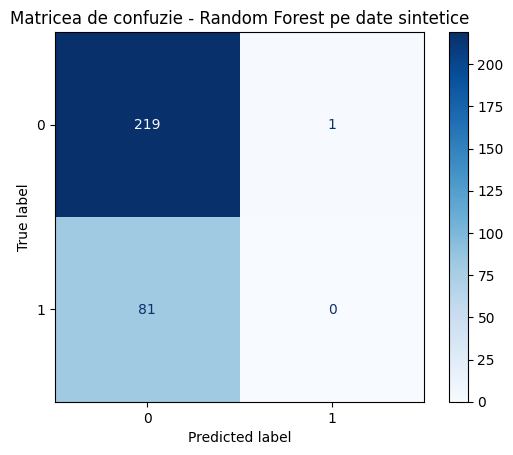

In [ ]:

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matricea de confuzie - Random Forest pe date sintetice")
plt.show()

In [19]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("synthetic_diabetes_data.csv")

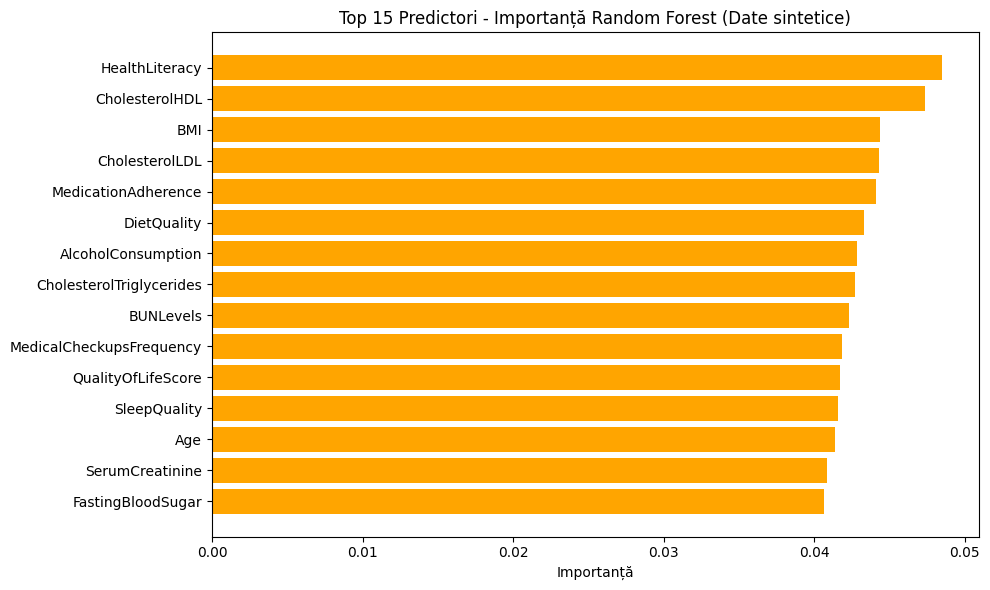

In [ ]:
X = df.drop(columns=["Diagnosis"])
y = df["Diagnosis"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

importances = model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False).head(15)

plt.figure(figsize=(10, 6))
plt.barh(importance_df["Feature"], importance_df["Importance"], color="orange")
plt.gca().invert_yaxis()
plt.title("Top 15 Predictori - Importanță Random Forest (Date sintetice)")
plt.xlabel("Importanță")
plt.tight_layout()
plt.show()


In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("synthetic_diabetes_data.csv")
X = df.drop(columns=["Diagnosis"])
y = df["Diagnosis"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
logreg = LogisticRegression(max_iter=3000, solver='saga', random_state=42)
logreg.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=3000, random_state=42, solver='saga')

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
print("Acuratețea pe datele sintetice:", round(accuracy, 4))
print("\nRaport de clasificare:\n", classification_report(y_test, y_pred))

Acuratețea pe datele sintetice: 0.7276

Raport de clasificare:
               precision    recall  f1-score   support

           0       0.73      1.00      0.84       220
           1       0.00      0.00      0.00        81

    accuracy                           0.73       301
   macro avg       0.36      0.50      0.42       301
weighted avg       0.53      0.73      0.62       301



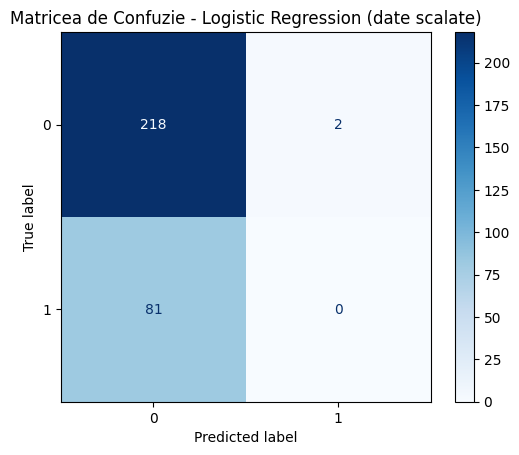

In [ ]:
y_pred = logreg.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matricea de Confuzie - Logistic Regression (date scalate)")
plt.show()

In [43]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

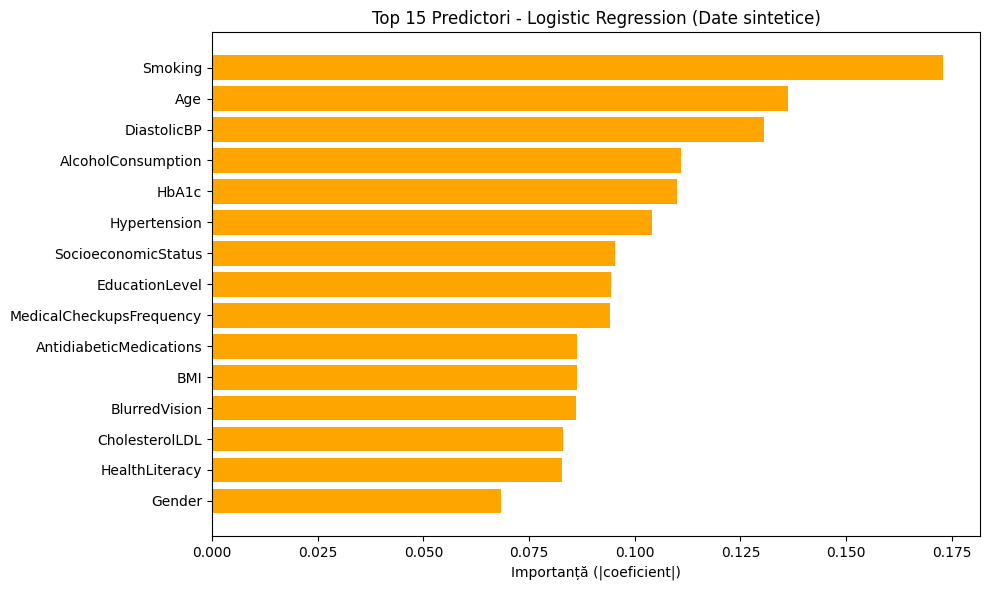

In [ ]:
coefficients = logreg.coef_[0]
feature_names = X.columns

importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Coefficient": coefficients,
    "Importance": np.abs(coefficients)
}).sort_values(by="Importance", ascending=False).head(15)

plt.figure(figsize=(10, 6))
plt.barh(importance_df["Feature"], importance_df["Importance"], color="orange")
plt.gca().invert_yaxis()
plt.title("Top 15 Predictori - Logistic Regression (Date sintetice)")
plt.xlabel("Importanță (|coeficient|)")
plt.tight_layout()
plt.show()

In [ ]:
df = pd.read_csv("synthetic_diabetes_data.csv")
X = df.drop(columns=["Diagnosis"])
y = df["Diagnosis"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = GradientBoostingClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Acuratețea pe datele sintetice:", round(accuracy, 4))
print("\nRaport de clasificare:\n", classification_report(y_test, y_pred))

Acuratețea pe datele sintetice: 0.7276

Raport de clasificare:
               precision    recall  f1-score   support

           0       0.73      1.00      0.84       220
           1       0.00      0.00      0.00        81

    accuracy                           0.73       301
   macro avg       0.36      0.50      0.42       301
weighted avg       0.53      0.73      0.62       301



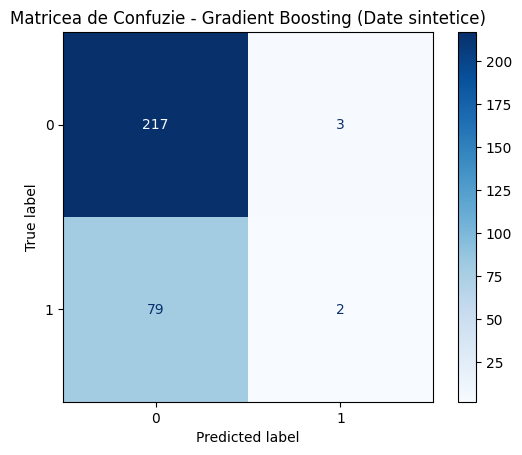

In [ ]:
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matricea de Confuzie - Gradient Boosting (Date sintetice)")
plt.show()

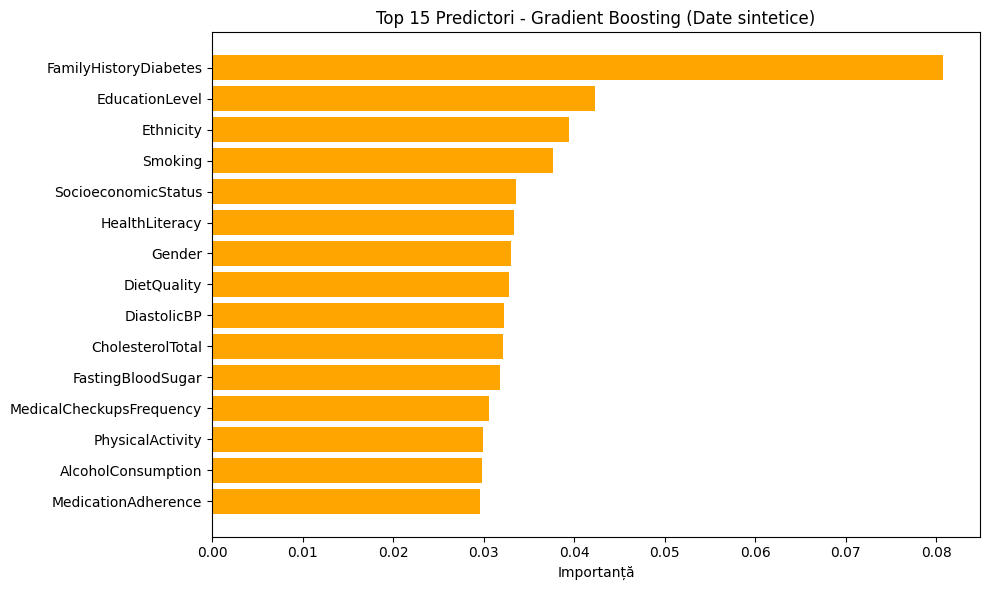

In [ ]:
importances = model.feature_importances_
feature_names = X.columns

importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False).head(15)

plt.figure(figsize=(10, 6))
plt.barh(importance_df["Feature"], importance_df["Importance"], color="orange")
plt.gca().invert_yaxis()
plt.title("Top 15 Predictori - Gradient Boosting (Date sintetice)")
plt.xlabel("Importanță")
plt.tight_layout()
plt.show()

In [55]:
pip install xgboost

In [56]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("synthetic_diabetes_data.csv")
X = df.drop(columns=["Diagnosis"])
y = df["Diagnosis"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from xgboost import XGBClassifier
model = XGBClassifier(eval_metric='logloss', random_state=42)
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Acuratețea pe datele sintetice:", round(accuracy, 4))
print("\nRaport de clasificare:\n", classification_report(y_test, y_pred))

Acuratețea pe datele sintetice: 0.7276

Raport de clasificare:
               precision    recall  f1-score   support

           0       0.73      1.00      0.84       220
           1       0.00      0.00      0.00        81

    accuracy                           0.73       301
   macro avg       0.36      0.50      0.42       301
weighted avg       0.53      0.73      0.62       301



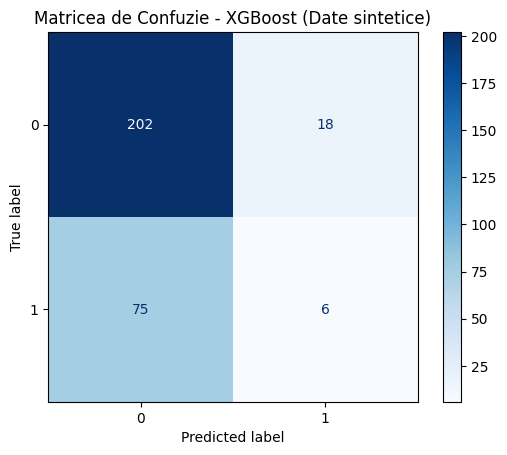

In [ ]:
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matricea de Confuzie - XGBoost (Date sintetice)")
plt.show()

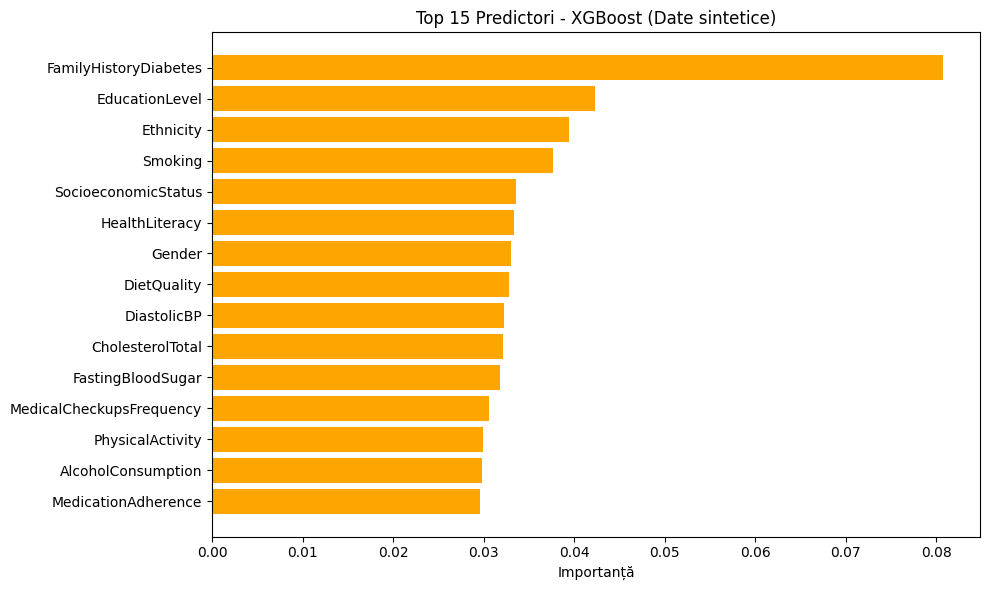

In [ ]:
importances = model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({
    "Feature": features,
    "Importance": importances
}).sort_values(by="Importance", ascending=False).head(15)

plt.figure(figsize=(10, 6))
plt.barh(importance_df["Feature"], importance_df["Importance"],color="orange")
plt.gca().invert_yaxis()
plt.title("Top 15 Predictori - XGBoost (Date sintetice)")
plt.xlabel("Importanță")
plt.tight_layout()
plt.show()

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, roc_auc_score
import xgboost as xgb

In [ ]:
df = pd.read_csv("synthetic_diabetes_data.csv")
X = df.drop(columns=["Diagnosis"])
y = df["Diagnosis"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:16:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


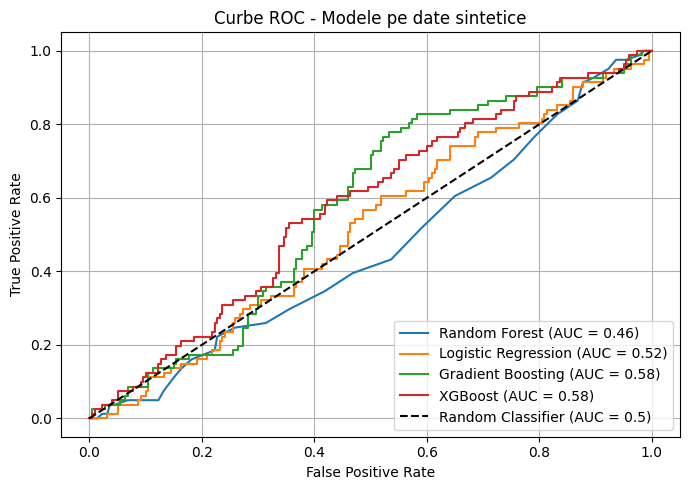

In [ ]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_probs = rf_model.predict_proba(X_test)[:, 1]
rf_auc = roc_auc_score(y_test, rf_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
lr_model = LogisticRegression(max_iter=3000, solver='saga', random_state=42)
lr_model.fit(X_train_scaled, y_train)
lr_probs = lr_model.predict_proba(X_test_scaled)[:, 1]
lr_auc = roc_auc_score(y_test, lr_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
gb_probs = gb_model.predict_proba(X_test)[:, 1]
gb_auc = roc_auc_score(y_test, gb_probs)
gb_fpr, gb_tpr, _ = roc_curve(y_test, gb_probs)

xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42,
                              n_estimators=50, max_depth=3, learning_rate=0.1)
xgb_model.fit(X_train, y_train)
xgb_probs = xgb_model.predict_proba(X_test)[:, 1]
xgb_auc = roc_auc_score(y_test, xgb_probs)
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_probs)

plt.figure(figsize=(7, 5))
plt.plot(rf_fpr, rf_tpr, label=f"Random Forest (AUC = {rf_auc:.2f})")
plt.plot(lr_fpr, lr_tpr, label=f"Logistic Regression (AUC = {lr_auc:.2f})")
plt.plot(gb_fpr, gb_tpr, label=f"Gradient Boosting (AUC = {gb_auc:.2f})")
plt.plot(xgb_fpr, xgb_tpr, label=f"XGBoost (AUC = {xgb_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier (AUC = 0.5)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curbe ROC - Modele pe date sintetice")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

In [76]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd

In [ ]:
def compute_all_metrics(y_true, y_pred, y_proba, model_name):
    return {
        "Model": model_name,
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred, zero_division=0),
        "Recall": recall_score(y_true, y_pred, zero_division=0),
        "F1 Score": f1_score(y_true, y_pred, zero_division=0),
        "AUC Score": roc_auc_score(y_true, y_proba)
    }

rf_metrics = compute_all_metrics(y_test, rf_model.predict(X_test), rf_probs, "Random Forest")
lr_metrics = compute_all_metrics(y_test, lr_model.predict(X_test_scaled), lr_probs, "Logistic Regression")
gb_metrics = compute_all_metrics(y_test, gb_model.predict(X_test), gb_probs, "Gradient Boosting")
xgb_metrics = compute_all_metrics(y_test, xgb_model.predict(X_test), xgb_probs, "XGBoost")

metrics_comparison = pd.DataFrame([rf_metrics, lr_metrics, gb_metrics, xgb_metrics])

print(metrics_comparison)

                 Model  Accuracy  Precision    Recall  F1 Score  AUC Score
0        Random Forest  0.727575        0.0  0.000000  0.000000   0.461925
1  Logistic Regression  0.724252        0.0  0.000000  0.000000   0.515937
2    Gradient Boosting  0.727575        0.4  0.024691  0.046512   0.577385
3              XGBoost  0.727575        0.0  0.000000  0.000000   0.578451


<Figure size 1200x600 with 0 Axes>

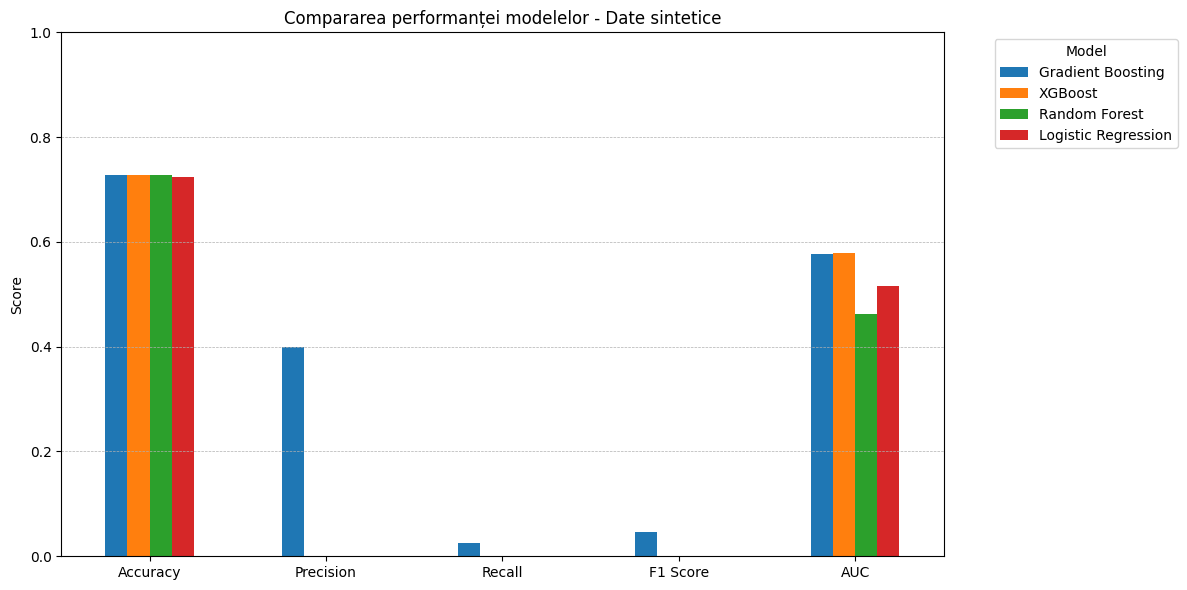

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data = {
    "Model": ["Gradient Boosting", "XGBoost", "Random Forest", "Logistic Regression"],
    "Accuracy": [0.7276, 0.7276, 0.7276, 0.7243],
    "Precision": [0.4, 0.0, 0.0, 0.0],
    "Recall": [0.0247, 0.0, 0.0, 0.0],
    "F1 Score": [0.0465, 0.0, 0.0, 0.0],
    "AUC": [0.5774, 0.5785, 0.4619, 0.5159]
}

df = pd.DataFrame(data)
df.set_index("Model", inplace=True)
df = df.T  

plt.figure(figsize=(12, 6))
df.plot(kind="bar", figsize=(12, 6))
plt.title("Compararea performanței modelelor - Date sintetice")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", linewidth=0.5)
plt.legend(title="Model", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()